In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
from pycaret.classification import *



In [8]:
model= setup(data=df, target = 'HeartDisease', 
             categorical_features = ['Sex','ChestPainType',"RestingECG",'ExerciseAngina','ST_Slope'], 
             ignore_features ="None",
              fix_imbalance = 'True',
              remove_outliers ='True',
              normalize ='True', 
              transformation ='True',
            #   transform_target ='False',
            #    polynomial_features = 'True', 
            #    rare_to_value='None', 
               feature_selection ='True',
               remove_multicollinearity ='True', 
               multicollinearity_threshold = 0.3, 
               pca = 'True', 
               pca_components =10,
               low_variance_threshold = 0.1,
            #    log_experiment="mlflow",
            #    experiment_name = 'Heart_Disease',
               log_plots='False',
               log_profile='False',
               log_data='False',
               train_size=0.7)

[LightGBM] [Info] Number of positive: 337, number of negative: 337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2250
[LightGBM] [Info] Number of data points in the train set: 674, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

,Description,Value
0,Session id,4905
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(950, 3)"
5,Transformed train set shape,"(674, 3)"
6,Transformed test set shape,"(276, 3)"
7,Ignore features,4
8,Ordinal features,2
9,Numeric features,6


In [9]:
import xgboost


In [20]:
# best = compare_models()
best = compare_models(sort = 'Accuracy')
# best = compare_models(probability_threshold = 0.5) #classification only
# best = compare_models(cross_validation='True')  #C & R
# best = compare_models(parallel = FugueBackend(spark))
# best = compare_models(n_select = 10) //top 10 models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7649,0.8312,0.8138,0.7812,0.7946,0.5194,0.5244,0.7360
lr,Logistic Regression,0.7570,0.8285,0.7771,0.7858,0.7797,0.5078,0.5103,0.9420
ada,Ada Boost Classifier,0.7556,0.8248,0.8049,0.7769,0.7854,0.4997,0.5091,0.1700
qda,Quadratic Discriminant Analysis,0.7509,0.8256,0.7745,0.7777,0.7752,0.4954,0.4969,0.1460
knn,K Neighbors Classifier,0.7492,0.8032,0.8024,0.7607,0.7791,0.4885,0.4931,0.4810
rf,Random Forest Classifier,0.7476,0.8099,0.7825,0.7704,0.7738,0.4873,0.4917,0.2360
lda,Linear Discriminant Analysis,0.7446,0.8225,0.7629,0.7779,0.7681,0.4825,0.4855,0.1600
lightgbm,Light Gradient Boosting Machine,0.7384,0.8147,0.7655,0.7683,0.7636,0.4691,0.4738,0.2580
ridge,Ridge Classifier,0.7351,0.0000,0.7374,0.7735,0.7536,0.4667,0.4691,0.1570
et,Extra Trees Classifier,0.7337,0.7951,0.7825,0.7515,0.7637,0.4574,0.4632,0.1970


In [21]:
print(best)

In [12]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [22]:
cat = create_model('catboost')
# lr = create_model('lr',cross_validation='True')
# dt = create_model('dt', max_depth = 5)                    //params
# lr = create_model('lr', return_train_score = True)
# lr = create_model('lr', probability_threshold = 0.25)      //classification

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.7088,0.8333,0.6122,0.7059,0.1863,0.2056
1,0.8462,0.9119,0.8889,0.8421,0.8649,0.6866,0.6879
2,0.7031,0.6895,0.8611,0.6889,0.7654,0.3745,0.3921
3,0.7656,0.7946,0.8611,0.7561,0.8052,0.5142,0.5210
4,0.7656,0.8423,0.7500,0.8182,0.7826,0.5294,0.5318
5,0.7656,0.8394,0.8857,0.7381,0.8052,0.5171,0.5308
6,0.7188,0.7635,0.8286,0.7073,0.7632,0.4223,0.4303
7,0.7344,0.7507,0.8286,0.7250,0.7733,0.4560,0.4620
8,0.8125,0.8916,0.8000,0.8485,0.8235,0.6239,0.6251


In [36]:
# #custom paerameters
# tuned_dt = tune_model(dt)
# tuned_dt = tune_model(lr, n_iter = 50)
# tuned_dt = tune_model(lr, optimize = 'Accuracy',n_iter=25)
# tuned_dt = tune_model(dt,choose_better = 'False')



Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [37]:
print(tuned_dt)

In [23]:
# tune_model(lr, search_library = 'optuna')  # tune model optuna
cat_tune=tune_model(cat, search_library = 'scikit-optimize')    # tune model scikit-optimize
# tune_model(lr, search_library = 'tune-sklearn', search_algorithm = 'hyperopt')  # tune model tune-sklearn

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:15:01
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6923,0.7826,0.8333,0.6818,0.7500,0.3602,0.3726
1,0.8154,0.8448,0.8889,0.8000,0.8421,0.6214,0.6264
2,0.7812,0.8304,0.9722,0.7292,0.8333,0.5333,0.5819
3,0.7656,0.8016,0.8889,0.7442,0.8101,0.5102,0.5241
4,0.7656,0.7976,0.8611,0.7561,0.8052,0.5142,0.5210
5,0.7969,0.8433,0.9143,0.7619,0.8312,0.5815,0.5968
6,0.7188,0.7291,0.8286,0.7073,0.7632,0.4223,0.4303
7,0.8125,0.8020,0.9143,0.7805,0.8421,0.6148,0.6266
8,0.7344,0.8512,0.7429,0.7647,0.7536,0.4656,0.4658


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [24]:
print(cat_tune)
# print(tuned_dt)

In [38]:
# ensemble model
# boosted_dt = ensemble_model(dt, method = 'Boosting')
# boosted_dt = ensemble_model(dt, method = 'Bagging')
# stacker = stack_models([lr, dt, knn])
# blender = blend_models([lr, dt, knn])

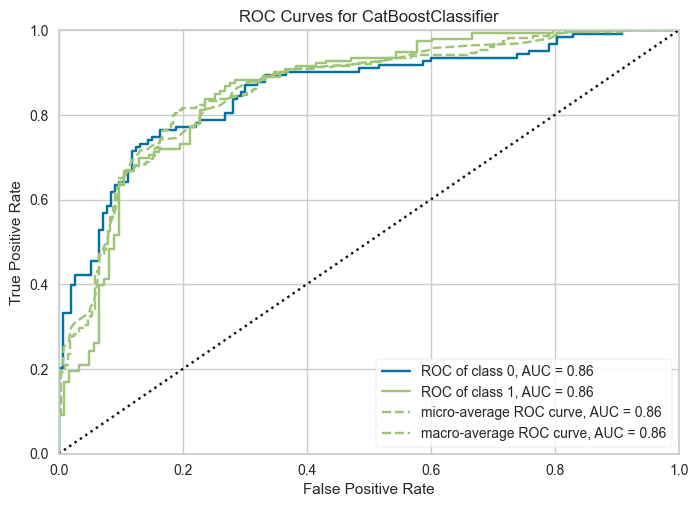

In [25]:
# plotcat_tune) # tuneel
plot_model(cat_tune, plot = 'auc', scale =1)

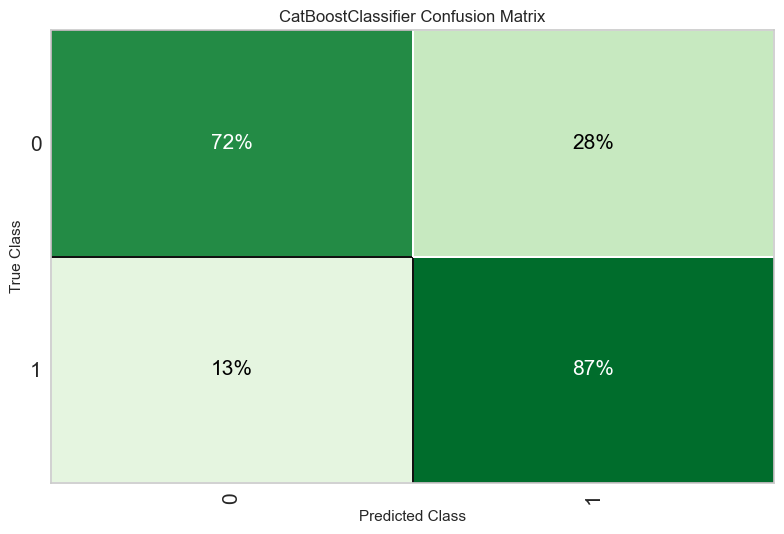

In [26]:
plot_model(cat_tune, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [27]:
# launch evaluate widget
evaluate_model(cat_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

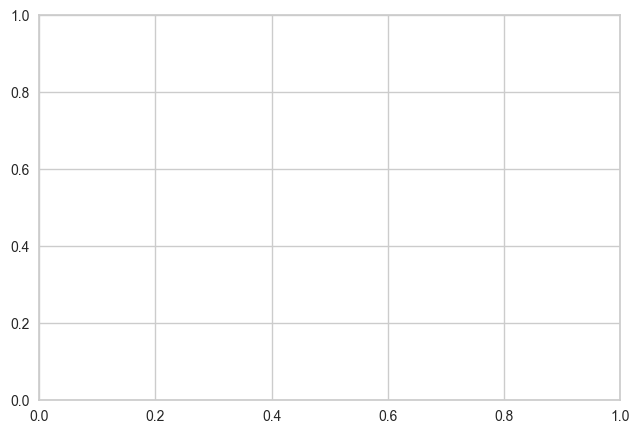

In [28]:
interpret_model(cat_tune, plot = 'correlation', feature = ['MaxHR','Age'])

In [ ]:
interpret_model(cat_tune, plot = 'msa')

In [29]:
interpret_model(cat_tune, plot = 'pfi')

2it [00:00, 113.53it/s]


In [63]:
interpret_model(tuned_dt, plot = 'reason')

In [32]:
import shap
shap.initjs()
interpret_model(cat_tune, plot = 'reason', observation = 1)

In [50]:
# interpret model
# interpret_model(tuned_dt)
# interpret_model(xgboost, plot = 'pdp')
# interpret_model(xgboost, plot = 'correlation', feature = 'Age (years)')
# interpret_model(xgboost, plot = 'msa')
# interpret_model(xgboost, plot = 'pfi')
# interpret_model(tuned_dt, plot = 'reason')
# interpret_model(tuned_dt, plot = 'reason', observation = 1)

In [33]:
interpret_model(cat_tune, plot = 'pdp')

In [34]:
# launch dashboard
dashboard(cat_tune)

Note: model_output=='probability'. For CatBoostClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calcul

ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8050): Max retries exceeded with url: /_alive_c0186bda-6112-4333-a78c-c0a366234674 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001843F37C2E0>: Failed to establish a new connection: [WinError 10049] The requested address is not valid in its context'))

In [35]:
final_lr = finalize_model(catboost)

IndexError: Length of values (872) does not match length of index (918). This usually happens when transformations that drop rows aren't applied on all the columns.

In [37]:
#AWS S3 Deployment


deploy_model(cat_tune, model_name = 'lr_aws', platform = 'aws', authentication = { 'bucket'  : 'pycaret-test' })

EndpointConnectionError: Could not connect to the endpoint URL: "https://pycaret-test.s3.None.amazonaws.com/lr_aws.pkl"

In [42]:
create_api(cat,'cat_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python cat_api.py


In [45]:
!python cat_api.py